<a href="https://colab.research.google.com/github/JBSspc/PracticasComputacionII/blob/main/%5CTareas%5CNumericalMethods_sPc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Método gráfico
* Evaluamos las ecuaciones <code>e1</code> y <code>e2</code> en el intervalo <code>a</code> < x < <code>b</code> (elejido por el usuario). La solución del sistema está en la intersección de ambas pendientes. 

Start at: -8.5
End at: -7
Elapsed time for the graphing method is:  0.017455101013183594 s


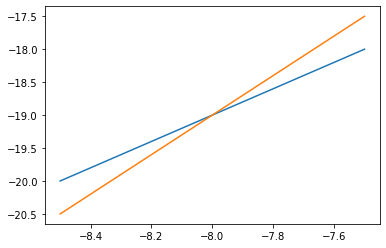

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x, y, z
import time

# We create our 'Graph' class
# INPUT: [a,b] interval, 
class Graph:
  def graph2DPlot(self, start, end, equation):
    X = np.arange(start, end)
    Y = np.zeros_like(X)
    for i in range(len(X)):
      Y[i] = equation.subs(x, X[i])
    plt.plot(X,Y)

def main():

  # interval's definition (user's input)
  a = float(input("Start at: "))
  b = float(input("End at: "))

  # 2 equations, 1 unkown variable
  e1 = 2*x +- 3
  e2 = 3*x + 5

  # We create our object to graph
  objG = Graph()

  # Solve the set of eqns by 2D graphing method
  start = time.time()
  objG.graph2DPlot(a, b, e1)
  objG.graph2DPlot(a, b, e2)
  end = time.time()
  elapsedGraph = end - start
  print("Elapsed time for the graphing method is: ", elapsedGraph, "s")

if __name__ == "__main__":
  main()

## 2. Búsqueda incremental
* No es un método como tal (no encuentra raíces), pero es conveniente cuando queremos aplicar algún método. 
* Se toma un extremo del intervalo y se evalúa la función de interés con pequeños incrementos a lo largo del intervalo.
* El proceso se suspende cuando hay un cambio de signo y/o cuando se alcanza el máximo de iteraciones sin ecnontrar el cambio de signo.

In [ ]:
import time
class Naive_Methods:
  def incrementalSearch(self, a, b, tol, f):
    X = np.linspace(a, b, 10000)

    for i in range(len(X)):
      if (abs(f.subs(x, X[i]))) <= tol:
        print("Root could be at: ", X[i])

def main():
  tol = 0.0000000001
  f = x**2 - 50*x - 25

  objN = Naive_Methods()

  start = time.time()
  objN.incrementalSearch(-100, 100, tol, f)
  end = time.time()
  elapsedN = end - start
  
  print("Elapsed time for incremental search is: ", (elapsedN), " s")

if __name__ == "__main__":
  main()


El tiempo de ejecución de la búsqueda incremental fue:  8.466934442520142  s


## 3. Bisección
* Verificamos que hay un cambio de signo: si sí, es probable que haya una raíz
* Se realiza hasta alcanzar el número máximo de iteraciones


In [12]:
import numpy as np
import math
from sympy.abc import x,y
import time
import sys

class NumMethods:
  def bisect(self, l, u, tol, maxIter, f):
    fl = f.subs(x, l) # f @ lower guess
    fu = f.subs(x, u) # f @ upper guess 

    if (fl * fu) < 0:
      print("Sign switch!")
    else:
      sys.exit("Ups! No real roots in the interval")
    es = np.inf # error
    iter = 0 # desired percent relative error

    while iter < maxIter: # maxIter is define @ main
      r = (l + u) / 2 # root
      fr = f.subs(x, r) # f(r)
      if (abs(fr) <= tol) or (abs(l-u) <= tol):
        return r
      
      fl = f.subs(x, l) # f(l) := f @ lowest guess
      fu = f.subs(x, u) # f(u) := f @ upper guess

      if fl*fr < 0:
        u = r
      else:
        l = r

      iter +=1
    
    print("Maximum number of iterations reached.\n The approximated root is x = ", r)
    return r

def main():
  maxIter = 900000
  tol = 0.0000000001
  f = x**2 - 101*x - 19800

  objNM = NumMethods()
  start = time.time() # start recording elpased time 
  root = objNM.bisect(-100, 100, tol, maxIter, f)
  end = time.time() # end recordig elapsed time
  elapsedBisect = end - start
  print("Elapsed time for the bisection method: ", elapsedBisect, " s")

  if (root != np.inf):
    print("The real root is: ", float(root))
  else:
    print("No root :(")

if __name__ == "__main__":
  main()


Sign switch!
Elapsed time for the bisection method:  0.03850865364074707  s
The real root is:  -99.00000000002365


## 4. Newton-Raphson

In [8]:
import numpy as np
import time

class NumMethods:
  def NewtonRaphson(self, f, x, tol, maxIter ):
    for i in range(maxIter):
      c = x - f[0](x)/f[1](x) # x - f(x)/ f'(x)
      if abs(c-x) < tol: break # if the difference of new 'x' minus actual x < tol, stop
      x = c # new 'x' value is asigned to actual x
    return c, i

def main():
  maxIter = 900000
  tol = 0.0000000001
  
  f = [lambda x: 2*x**3 - 9.5*x + 7.5, lambda x: 6*x**2 - 9.5] # we make a list of functions 
  # f[0] = f(x) = 2*x**3 - 9.5*x + 7.5
  # f[1] = f'(x) = 6*x**2 - 9.5

  objNM = NumMethods() # Object of 'NumMethds' class
  start = time.time() # start recording elpased time 
  x,n = objNM.NewtonRaphson(f,5, tol, maxIter) # Call the function
  end = time.time() # end recordig elapsed time
  elapsedNR = end - start
  print("Elapsed time for the Newton - Raphson method: ", elapsedNR, " s")

  if (x != np.inf):
    print("The root is %f at %d iterations :D" % (x,n))
  else:
    print("No root :(")

if __name__ == "__main__":
  main()

Elapsed time for the Newton - Raphson method:  2.6941299438476562e-05  s
The root is 1.500000 at 9 iterations :D
